<a href="https://colab.research.google.com/github/damianmtz98/Datos_Masivos_MCD/blob/main/P5.PreddiccionPrecioUSDMXN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from numpy import array
from numpy import append

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [3]:
serieP=array([10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23,14,85,14,36,10,25,23,14,25,23])
print(serieP)

[10 25 23 14 25 23 14 85 14 36 10 25 23 14 25 23 14 85 14 36 10 25 23 14
 25 23 14 85 14 36 10 25 23 14 25 23]


In [4]:
def DescomponerSerie(serie,longitud):
    global X, y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final > len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)

In [5]:
DescomponerSerie(serieP,12)


(array([[10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14],
        [14, 36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36],
        [36, 10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10],
        [10, 25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25],
        [25, 23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23],
        [23, 14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14],
        [14, 25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25],
        [25, 23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23],
        [23, 14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14],
        [14, 85, 14, 36, 10, 25, 23, 14, 25, 23, 14, 85],
        [85, 1

In [6]:

for i in range(len(X)):
    print(X[i], y[i])

[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23
[25 23 14 85 14 36 10 25 23 14 25 23] 14
[23 14 85 14 36 10 25 23 14 25 23 14] 85
[14 85 14 36 10 25 23 14 25 23 14 85] 14
[85 14 36 10 25 23 14 25 23 14 85 14] 36
[14 36 10 25 23 14 25 23 14 85 14 36] 10
[36 10 25 23 14 25 23 14 85 14 36 10] 25
[10 25 23 14 25 23 14 85 14 36 10 25] 23
[25 23 14 25 23 14 85 14 36 10 25 23] 14
[23 14 25 23 14 85 14 36 10 25 23 14] 25
[14 25 23 14 85 14 36 10 25 23 14 25] 23


In [8]:
bd = pd.read_csv("usdmxn.csv")
bd.head()


,Date,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
0,16/07/2018,19.01,1.17,111.43,75.35,1977.5,4565.72,35061.21,3.9
1,23/07/2018,18.61,1.17,111.04,75.42,1960.1,4505.42,34509.03,3.9
2,30/07/2018,18.54,1.16,111.26,73.86,1926.2,4398.95,33734.88,3.9
3,06/08/2018,18.90,1.14,110.87,70.64,1921.1,4450.38,34407.60,3.9
4,13/08/2018,18.88,1.15,110.49,69.16,1919.1,4348.33,33727.43,3.9


In [12]:
# Eliminar columnas (por ejemplo, las columnas "columna1" y "columna2")
columnas_a_eliminar = ["USD/EUR", "USD/JPY", "Oil", "Gold", "S&P500", "DowJones",
"TasaDesempleoUSA"]
bd = bd.drop(columns=columnas_a_eliminar)

# Ver el DataFrame después de eliminar columnas
print("DataFrame después de eliminar columnas:")
print(bd.head())

DataFrame después de eliminar columnas:
        Date  USD/MXN
0 2018-07-16    19.01
1 2018-07-23    18.61
2 2018-07-30    18.54
3 2018-08-06    18.90
4 2018-08-13    18.88


In [13]:
bd['Date'] = pd.to_datetime(bd['Date'], infer_datetime_format=True)
bd=pd.DataFrame(bd)
bd.head()

,Date,USD/MXN
0,2018-07-16,19.01
1,2018-07-23,18.61
2,2018-07-30,18.54
3,2018-08-06,18.90
4,2018-08-13,18.88


In [14]:
bd.columns

Index(['Date', 'USD/MXN'], dtype='object')

In [15]:
bd.columns = ["Date","USD/MXN"]
bd.head()

,Date,USD/MXN
0,2018-07-16,19.01
1,2018-07-23,18.61
2,2018-07-30,18.54
3,2018-08-06,18.90
4,2018-08-13,18.88


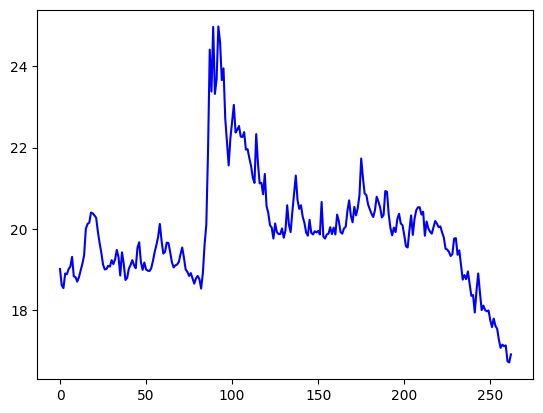

In [16]:
plt.plot(bd["USD/MXN"],color="BLUE")

<Axes: xlabel='Date'>

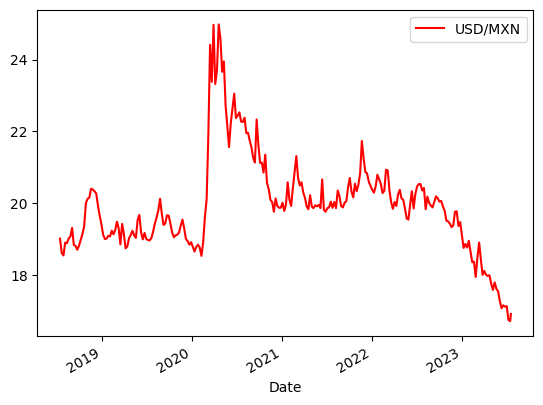

In [19]:
bd.plot(x="Date", y="USD/MXN",color="red")

In [ ]:
Secuencia = list(PP["USD/MXN"])
print(Secuencia)

In [ ]:
DescomponerSerie(Secuencia,12)

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

In [23]:
# define model
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=12))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='ADAM', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=10, batch_size=10)

In [26]:
print("Genera predicciones")
predictions = model.predict(X)
print("predictions shape:", predictions)

Genera predicciones
8/8 [==============================] - 0s 2ms/step
predictions shape: [[18.486286]
 [18.805504]
 [19.073683]
 [19.320398]
 [19.793547]
 [19.97879 ]
 [19.950565]
 [20.084652]
 [19.83013 ]
 [19.740742]
 [19.789146]
 [19.552454]
 [19.327244]
 [19.309702]
 [19.139431]
 [19.102055]
 [19.251183]
 [19.375065]
 [19.436106]
 [19.614773]
 [19.4346  ]
 [19.404198]
 [19.467983]
 [19.237556]
 [18.909311]
 [19.249136]
 [18.907816]
 [18.719406]
 [18.953083]
 [18.899797]
 [18.915062]
 [19.33713 ]
 [19.341516]
 [19.0001  ]
 [19.391745]
 [19.439276]
 [19.11464 ]
 [19.037233]
 [18.967731]
 [18.680304]
 [18.90754 ]
 [19.040455]
 [18.962717]
 [19.18829 ]
 [19.512041]
 [19.576284]
 [19.651543]
 [19.90555 ]
 [19.536512]
 [19.279783]
 [19.145575]
 [19.136608]
 [19.282145]
 [19.457918]
 [19.355839]
 [19.115528]
 [19.161654]
 [19.160881]
 [19.231237]
 [19.410923]
 [19.586636]
 [19.435535]
 [19.187073]
 [18.941088]
 [18.657328]
 [18.753407]
 [18.807371]
 [18.787584]
 [18.893415]
 [18.956558]


In [27]:

Predictions=pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()

,Predictions
0,18.486286
1,18.805504
2,19.073683
3,19.320398
4,19.793547


In [28]:

Real=pd.DataFrame(y)
Real.columns = ["Real"]
Real.head()


,Real
0,18.98
1,19.14
2,19.35
3,20.00
4,20.12


In [29]:

RealPredictions=pd.concat([Predictions,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Predictions,Real
0,18.486286,18.98
1,18.805504,19.14
2,19.073683,19.35
3,19.320398,20.00
4,19.793547,20.12


<Axes: >

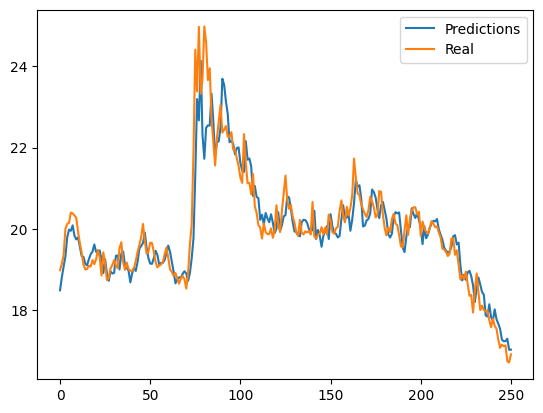

In [30]:

RealPredictions.plot(y=['Predictions','Real'])